# Regression Analysis

## Table of Contents

1. [Setup and Installation](#2-setup-and-installation)
   - [1.1 Import Libraries](#31-import-libraries)

2. [Data Extraction & Inspection](#3-Data-Extraction-&-Inspection) 
   - [2.1 Load CSV](#32-Load-CSV)
   - [2.2 Inspect dataset](#32-Inspect-dataset)


5. [Data Cleaning and Transformation](#5-data-cleaning-and-transformation)
   - [5.1 Data Cleaning Process](#51-data-cleaning-process)
   - [5.2 Cleaned Dataset Preview](#52-cleaned-dataset-preview)

6. [Exploratory Data Analysis](#6-exploratory-data-analysis)
   - [6.1 ](#61-seasonal-analysis)
   - [6.2 ](#62-price-trends)
7. 


## 1. Setup and Installation

### Required Packages
The following libraries are required for this analysis:
- **Pandas**: Data manipulation and analysis
- **Matplotlib**: Data visualization
- **Numpy**: Numerical manupilations 
- **Statsmodel** : Fit data to models
- **SSL** : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -r requirements.txt

## 2. Data Extraction

2.1 Load CSV Dataset

In [3]:
df = pd.read_csv('co2_emissions_from_agri.csv')
df.head(10)

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   
5  Afghanistan  1995        14.7237        0.0557       243.8152   
6  Afghanistan  1996        38.9302        0.2014       249.0364   
7  Afghanistan  1997        30.9378        0.1193       276.2940   
8  Afghanistan  1998        64.1411        0.3263       287.4346   
9  Afghanistan  1999        46.1683        0.0895       247.4980   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   
5            666.40                          0.0                 11.712073   
6            686.00                          0.0                 11.712073   
7            705.60                          0.0                 11.712073   
8            705.60                          0.0                 11.712073   
9            548.80                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   
5         54.6445   -2388.803  ...           397.5498                     0.0   
6         53.1637   -2388.803  ...           465.2050                     0.0   
7         52.0390   -2388.803  ...           511.5927                     0.0   
8         52.7050   -2388.803  ...           541.6598                     0.0   
9         35.7630   -2388.803  ...           611.0611                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   
5                              0.0                 NaN        13401971.0   
6                              0.0                 NaN        13952791.0   
7                              0.0                 NaN        14373573.0   
8                              0.0                 NaN        14733655.0   
9                              0.0                 NaN        15137497.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   
5         3697570.0                8219467.0                  8199445.0   
6         3870093.0                8569175.0                  8537421.0   
7         4008032.0                8916862.0                  8871958.0  

2.2 Data Inspection  

In [5]:
# For a more detailed summary including non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [77]:
# Drop the 'Area' column
df = df.drop(columns=['Area'])

In [6]:
# Describe numeric columns
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna fires                    6934.0  1.188391e+03  5.246288e+03   
Forest fires                     6872.0  9.193022e+02  3.720079e+03   
Crop Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net Forest conversion            6472.0  1.760564e+04  1.011575e+05   
Food Household Consumption       6492.0  4.847580e+03  2.578914e+04   
Food Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use          6965.0  1.626681e+03  9.343182e+03   
Food Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood Systems Waste Disposal  6965.0  6.018445e+03  2.215674e+04   
Food Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6222.0  1.999150e+04  1.114209e+05   
Manure applied to Soils          6037.0  9.232256e+02  3.226992e+03   
Manure left on Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure Management                6037.0  2.263345e+03  7.980542e+03   
Fires in organic soils           6965.0  1.210316e+03  2.266985e+04   
Fires in humid tropical forests  6810.0  6.684529e+02  3.264879e+03   
On-farm energy use               6009.0  3.008982e+03  1.263786e+04   
Rural population                 6965.0  1.785774e+07  8.901521e+07   
Urban population                 6965.0  1.693230e+07  6.574362e+07   
Total Population - Male          6965.0  1.761963e+07  7.603993e+07   
Total Population - Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average Temperature °C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna fires                         0.000000       0.000000  1.651850e+00   
Forest fires                          0.000000       0.000000  5.179000e-01   
Crop Residues                         0.000200      11.006525  1.036982e+02   
Rice Cultivation                      0.000000     181.260800  5.348174e+02   
Drained organic soils (CO2)           0.000000       0.000000  0.000000e+00   
Pesticides Manufacturing              0.000000       6.000000  1.300000e+01   
Food Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2848.350000 -6.292000e+01   
Net Forest conversion                 0.000000       0.000000  4.444000e+01   
Food Household Consumption            0.000000      11.399950  1.554711e+02   
Food Retail                           0.000000      26.818500  1.720426e+02   
On-farm Electricity Use               0.000000       8.037600  2.912070e+01   
Food Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood Systems Waste Disposal       0.340000      86.680500  9.012757e+02   
Food Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      39.031525  8.037066e+02   
Manure applied to Soils               0.049000      16.303000  1.204439e+02   
Manure left on Pasture                0.000700     139.669900  9.725674e+02   
Manure Management                     0.432900      37.632100  2.698563e+02   
Fires in organic soils                0.000000       0.000000  0.000000e+00   
Fires in humid 

In [7]:
# Replace spaces with underscores in all column names
df.columns = df.columns.str.replace(' ', '_')

# Verify the changes
print("Updated column names:", df.columns.tolist())

Updated column names: ['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Rice_Cultivation', 'Drained_organic_soils_(CO2)', 'Pesticides_Manufacturing', 'Food_Transport', 'Forestland', 'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils', 'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests', 'On-farm_energy_use', 'Rural_population', 'Urban_population', 'Total_Population_-_Male', 'Total_Population_-_Female', 'total_emission', 'Average_Temperature_°C']


## Checking for linearity

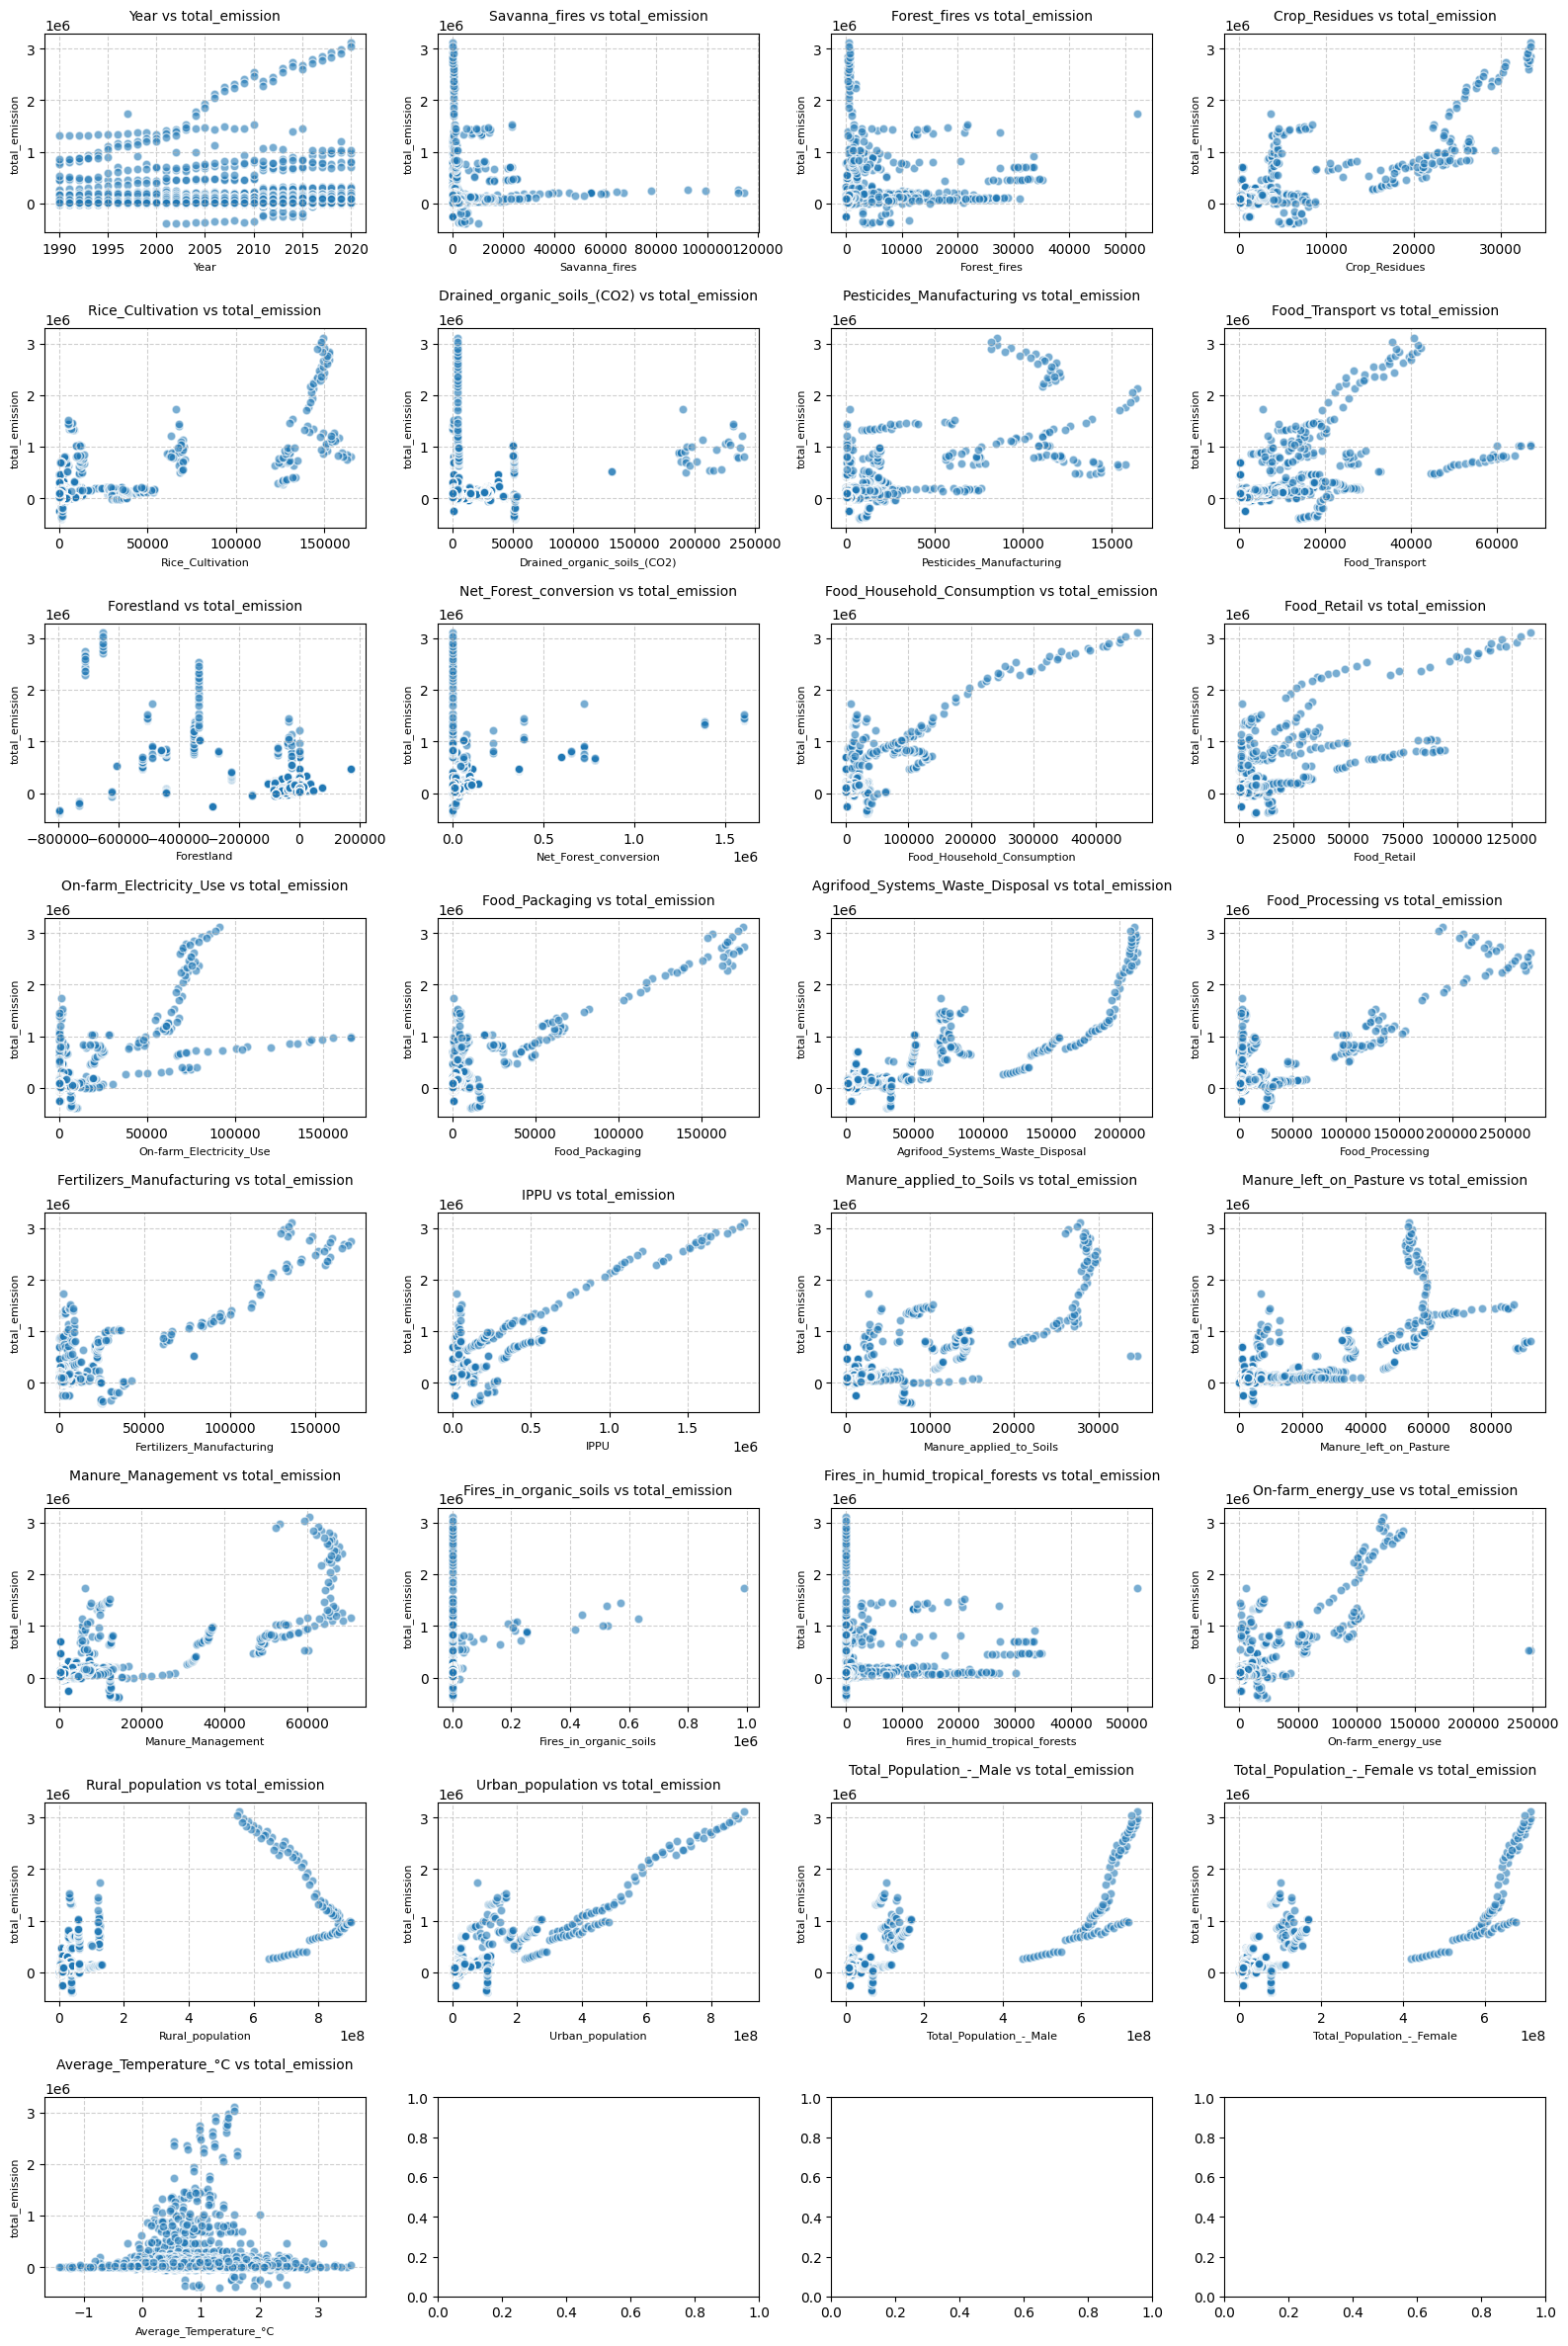

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set the target column
target = 'total_emission'

# Get numerical columns (excluding the target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)

# Calculate grid layout
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create figure with appropriate size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easier iteration
axs = axs.ravel()

# Plot each feature against the target
for idx, col in enumerate(numerical_cols):
    axs[idx].scatter(
        x=df[col], 
        y=df[target],
        alpha=0.6,
        color='#1f77b4',
        edgecolor='w',
        s=40
    )
    
    # Set labels
    axs[idx].set_title(f"{col} vs {target.split(' (')[0]}", fontsize=10, pad=10)
    axs[idx].set_xlabel(col, fontsize=8)
    axs[idx].set_ylabel(target, fontsize=8)
    axs[idx].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

#### Notes from visuals produced above to pick up few linearity from different variables

- It appears that a significant amount of our variables have an approximately linear relationship. Here, a trend between each of `food household consumption, Food Packgaging, IPPU, Fertilization Manufacturing, Urban or Rural Population`, and `total_emission` seems to exist.

Based on these findings, it appears that there is enough linearity present to apply a linear regression model.

etc...


## Checking for multicollinearity

In [10]:
print("Missing values:\n", df.isna().sum())

Missing values:
 Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use     

In [21]:
# Get all column names
cols = df.columns.tolist()

# Check if the column exists
if 'total_emission' in cols:
    # Move the column to the first position
    cols.remove('total_emission')
    new_cols = ['total_emission'] + cols
    df = df[new_cols]
    print("Reordered columns successfully!")

# Rename the column to remove the degree symbol
df = df.rename(columns={'Average_Temperature_°C': 'Average_Temperature_C'})
# Replace hyphens with underscores in all column names
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_')

df.head()

Reordered columns successfully!


total_emission         area  year  savanna_fires  forest_fires  \
0     2198.963539  Afghanistan  1990        14.7237        0.0557   
1     2323.876629  Afghanistan  1991        14.7237        0.0557   
2     2356.304229  Afghanistan  1992        14.7237        0.0557   
3     2368.470529  Afghanistan  1993        14.7237        0.0557   
4     2500.768729  Afghanistan  1994        14.7237        0.0557   

   crop_residues  rice_cultivation  drained_organic_soils_co  \
0       205.6077            686.00                       0.0   
1       209.4971            678.16                       0.0   
2       196.5341            686.00                       0.0   
3       230.8175            686.00                       0.0   
4       242.0494            705.60                       0.0   

   pesticides_manufacturing  food_transport  ...  manure_left_on_pasture  \
0                 11.807483         63.1152  ...               1590.5319   
1                 11.712073         61.2125  ...               1657.2364   
2                 11.712073         53.3170  ...               1653.5068   
3                 11.712073         54.3617  ...               1642.9623   
4                 11.712073         53.9874  ...               1689.3593   

   manure_management  fires_in_organic_soils  fires_in_humid_tropical_forests  \
0           319.1763                     0.0                              0.0   
1           342.3079                     0.0                              0.0   
2           349.1224                     0.0                              0.0   
3           352.2947                     0.0                              0.0   
4           367.6784                     0.0                              0.0   

   on_farm_energy_use  rural_population  urban_population  \
0                 NaN         9655167.0         2593947.0   
1                 NaN        10230490.0         2763167.0   
2                 NaN        10995568.0         2985663.0   
3                 NaN        11858090.0         3237009.0   
4                 NaN        12690115.0         3482604.0   

   total_population_male  total_population_female  average_temperature_c  
0              5348387.0                5346409.0               0.536167  
1              5372959.0                5372208.0               0.020667  
2              6028494.0                6028939.0              -0.259583  
3              7003641.0                7000119.0               0.101917  
4              7733458.0                7722096.0               0.372250  

[5 rows x 31 columns]

In [22]:
# Clean up column names: remove non-alphabetic characters and convert to snake_case
import re

def clean_column_name(column):
    # Replace any sequence of non-alphabetic characters with a single underscore
    column = re.sub(r'[^a-zA-Z]+', '_', column)
    # Remove leading/trailing underscores and convert to lowercase
    return column.strip('_').lower()

# Apply the cleaning function to all column names
df.columns = [clean_column_name(col) for col in df.columns]

In [23]:
#Generate the regression string
formula_str = df.columns[0]+' ~ '+'+'.join(df.columns[1:])
formula_str

'total_emission ~ area+year+savanna_fires+forest_fires+crop_residues+rice_cultivation+drained_organic_soils_co+pesticides_manufacturing+food_transport+forestland+net_forest_conversion+food_household_consumption+food_retail+on_farm_electricity_use+food_packaging+agrifood_systems_waste_disposal+food_processing+fertilizers_manufacturing+ippu+manure_applied_to_soils+manure_left_on_pasture+manure_management+fires_in_organic_soils+fires_in_humid_tropical_forests+on_farm_energy_use+rural_population+urban_population+total_population_male+total_population_female+average_temperature_c'

In [24]:
#Construct and fit the model using ols
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

#Print the summary of the model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.131e+28
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:09:09   Log-Likelihood:                 79665.
No. Observations:                4546   AIC:                        -1.590e+05
Df Residuals:                    4361   BIC:                        -1.578e+05
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------